In [117]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("data_graenichen.csv")

In [83]:
df.head()

,Datum,luftfeuchtigkeiit,niederschlag10min,cbar20cm,cbar35cm,temp2m,bodentemp20cm,bodentemp35cm
Datum,,,,,,,,
01.01.20 00:00,01.01.20 00:00,100,0.0,3.2,2.6,-1.3,3.6,4.1
02.01.20 00:00,02.01.20 00:00,100,0.0,3.2,2.7,-0.9,3.3,3.9
03.01.20 00:00,03.01.20 00:00,99,0.4,3.3,2.8,3.1,3.6,3.9
04.01.20 00:00,04.01.20 00:00,88,0.2,3.4,2.8,5.5,4.3,4.4
05.01.20 00:00,05.01.20 00:00,96,0.0,3.4,2.9,0.3,3.8,4.3


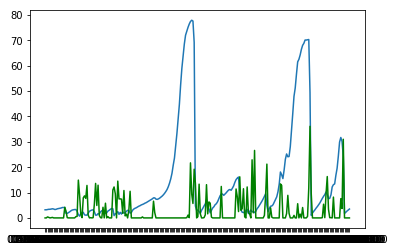

In [20]:
plt.plot(df["Datum"], df["cbar20cm"])
#plt.plot(df["Datum"], df["luftfeuchtigkeiit"], "g")
plt.plot(df["Datum"], df["niederschlag10min"], "g")

In [25]:
rain = pd.read_csv("data_graenichen-niederschlag-10min.csv")
rain.head()

,datum,mm
0,01.01.20 00:00,0.0
1,01.01.20 00:10,0.0
2,01.01.20 00:20,0.0
3,01.01.20 00:30,0.0
4,01.01.20 00:40,0.0


In [28]:
rain["datum"] = pd.to_datetime(rain["datum"])
print(rain.index)

RangeIndex(start=0, stop=35659, step=1)


In [34]:
rain['date_minus_time'] = rain["datum"].apply( lambda rain : 
datetime.datetime(year=rain.year, month=rain.month, day=rain.day))	
rain.set_index(rain["date_minus_time"],inplace=True)

In [39]:
rain.head()

,datum,mm,date_minus_time
date_minus_time,,,
2020-01-01,2020-01-01 00:00:00,0.0,2020-01-01
2020-01-01,2020-01-01 00:10:00,0.0,2020-01-01
2020-01-01,2020-01-01 00:20:00,0.0,2020-01-01
2020-01-01,2020-01-01 00:30:00,0.0,2020-01-01
2020-01-01,2020-01-01 00:40:00,0.0,2020-01-01


In [40]:
rain_per_day = rain['mm'].resample('D', how='sum')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [48]:
rain_per_day = rain_per_day.to_frame()

In [53]:
rain_per_day.head()

,mm
date_minus_time,
2020-01-01,0.0
2020-01-02,5.8
2020-01-03,9.1
2020-01-04,0.0
2020-01-05,18.1


In [56]:
df.set_index(df["Datum"],inplace=True)

In [58]:
data = df.join(rain_per_day)

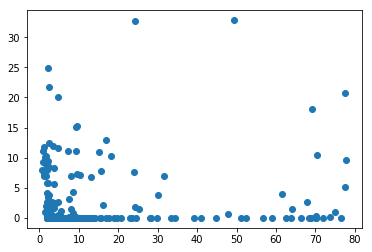

In [110]:
plt.scatter(data["cbar20cm"], data["mm"])

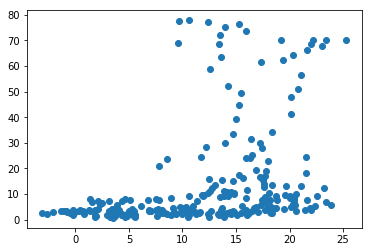

In [171]:
plt.scatter(data["temp2m"], data["cbar20cm"])

In [125]:
data.head(50)

,Datum,luftfeuchtigkeiit,niederschlag10min,cbar20cm,cbar35cm,temp2m,bodentemp20cm,bodentemp35cm,mm,sliding
Datum,,,,,,,,,,
2020-01-01,01.01.20 00:00,100,0.0,3.2,2.6,-1.3,3.6,4.1,0.0,NaN
2020-02-01,02.01.20 00:00,100,0.0,3.2,2.7,-0.9,3.3,3.9,0.0,NaN
2020-03-01,03.01.20 00:00,99,0.4,3.3,2.8,3.1,3.6,3.9,0.2,NaN
2020-04-01,04.01.20 00:00,88,0.2,3.4,2.8,5.5,4.3,4.4,0.2,NaN
2020-05-01,05.01.20 00:00,96,0.0,3.4,2.9,0.3,3.8,4.3,0.0,NaN
2020-06-01,06.01.20 00:00,100,0.1,3.5,2.9,-0.9,2.9,3.6,0.0,NaN
2020-07-01,07.01.20 00:00,99,0.2,3.6,3.0,1.8,2.5,3.2,0.2,6.000000e-01
2020-08-01,08.01.20 00:00,99,0.0,3.5,3.0,1.4,2.6,3.1,0.0,6.000000e-01
2020-09-01,09.01.20 00:00,86,0.0,3.3,2.8,3.3,2.7,3.2,0.0,6.000000e-01


In [172]:
data['sliding'] = data['mm'].rolling(5).sum()

In [192]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

X_train = train.iloc[:, 8].values.reshape(-1, 1)
X2_train = train.iloc[:,6].values.reshape(-1, 1)

y_train = train.iloc[:, 3].values.reshape(-1, 1)
X_test = test.iloc[:, 8].values.reshape(-1, 1)
X2_test = test.iloc[:,6].values.reshape(-1, 1)
y_test = test.iloc[:, 3].values.reshape(-1, 1)

In [194]:
X_train2 = list(zip(X_train, X2_train))
X_train3 = pd.DataFrame(X_train2, columns = ['X1', 'X2']).to_numpy()
X_test2 = list(zip(X_test, X2_test))
X_test3 = pd.DataFrame(X_test2, columns = ['X1', 'X2']).to_numpy()


In [195]:
# Linear
model = LinearRegression()
model.fit(X_train3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [196]:
y_pred = model.predict(X_test3)

In [197]:
r2_score(y_test, y_pred)

0.05196644509816728

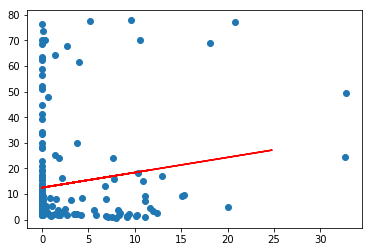

In [160]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [144]:
# Ridge
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
ridge_y_fit = ridge.predict(X_test)

In [145]:
r2_score(y_test, ridge_y_fit)

-0.035356156621096035

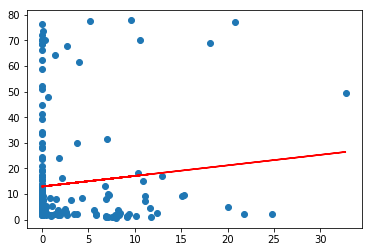

In [146]:
plt.scatter(X_train, y_train)
plt.plot(X_test, ridge_y_fit, color='red')
plt.show()

In [147]:
# SVM Regression
from sklearn import svm
svmregr = svm.SVR()
svmregr.fit(X_train, y_train)
svmregr_y_pred = svmregr.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [148]:
r2_score(y_test, svmregr_y_pred)

-0.1620340280982453

In [152]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3))
sgdreg = reg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
y_pred = sgdreg.predict(X_test)

In [154]:
r2_score(y_test, y_pred)

-0.03714863313568828

In [168]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

regr = MLPRegressor(random_state=1, max_iter=100000).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Expected 2D array, got 1D array instead:
array=[14.17130406 11.77200202 14.17130406 11.77200202 14.17130406 14.17130406
 14.17130406 14.17130406 13.58926847 14.17130406  8.38717126 24.56776446
  8.00416863  7.95820168 11.75272535 27.56324063 14.17130406 14.17130406
 14.17130406  9.22977705 22.50387574 11.12030474  8.31057074 13.58926847
  8.30906146 14.17130406 14.17130406 14.17130406 14.17130406 14.17130406
 14.17130406 14.17130406 14.17130406 14.58488287 13.58926847 27.67194532
 14.17130406 10.33413321 14.17130406 14.17130406 12.39608592 14.17130406
 14.17130406  7.77436705 14.17130406  9.95158765 14.17130406 12.38514596
 14.17130406  5.83290103 14.17130406  9.85546351 10.04722404 14.17130406
 14.17130406 14.17130406 28.19566125 12.29754067 14.17130406  9.04686014
 14.17130406  7.621166   14.17130406].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.